# TP4: Travail final

## Imports

In [69]:
from collections import defaultdict, Counter
import os
import re

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Exploration du sous-corpus

In [70]:
path = "./corpus/txt/"
files = []

files = [f for f in os.listdir(path) if f.endswith('.txt')]

# Imprimer le nombre de fichiers identifiés
print(f"Total files: {len(files)}")
print(files)

Total files: 938
['KB_JB838_1957-04-28_01-00002.txt', 'KB_JB838_1957-03-27_01-00003.txt', 'KB_JB838_1962-05-12_01-00009.txt', 'KB_JB838_1959-10-17_01-00004.txt', 'KB_JB838_1963-09-26_01-00010.txt', 'KB_JB838_1962-07-21_01-00009.txt', 'KB_JB838_1959-10-27_01-00002.txt', 'KB_JB838_1958-01-04_01-00002.txt', 'KB_JB838_1964-09-25_01-00004.txt', 'KB_JB838_1963-01-25_01-00006.txt', 'KB_JB1051_1957-05-31_01-00003.txt', 'KB_JB838_1960-02-25_01-00007.txt', 'KB_JB838_1959-09-12_01-00003.txt', 'KB_JB838_1958-04-20_01-00003.txt', 'KB_JB838_1958-07-08_01-00003.txt', 'KB_JB1051_1957-08-13_01-00004.txt', 'KB_JB838_1958-08-31_01-00003.txt', 'KB_JB838_1964-04-19_01-00002.txt', 'KB_JB838_1958-06-17_01-00003.txt', 'KB_JB1051_1958-06-27_01-00003.txt', 'KB_JB838_1958-03-18_01-00003.txt', 'KB_JB838_1962-12-12_01-00001.txt', 'KB_JB838_1957-07-10_01-00002.txt', 'KB_JB838_1964-09-24_01-00002.txt', 'KB_JB838_1958-09-26_01-00020.txt', 'KB_JB838_1962-04-26_01-00008.txt', 'KB_JB838_1957-03-23_01-00001.txt', 'KB_JB8

In [71]:
# Quelques stats

count_year = defaultdict(int)
count_month = defaultdict(int)
count_decade = defaultdict(int)
count_newspapers = defaultdict(int)
covered_years = set()

for f in files:
    if "_" in f and f.endswith("txt") and f != "_README.txt":
        elems = f.split("_")
        
        newspaper = elems[1]
        
        year = elems[2].split("-")[0]
        covered_years.add(year)
        decade = year[:3] + "0s"
        
        month = int(elems[2].split("-")[1])
        
        count_decade[decade] += 1
        count_newspapers[newspaper] += 1
        count_month[month] += 1
    else:
        print(f"Anomalous file: {f}")

In [72]:
print(f"Il y a {count_newspapers['JB838']} exemplaires du journal Le Soir et {count_newspapers['JB1051']} exemplaires de Le Drapeau rouge")

Il y a 701 exemplaires du journal Le Soir et 237 exemplaires de Le Drapeau rouge


In [73]:
all_path = "./corpus/output/all.txt"

with open(all_path, "w", encoding="utf-8") as output_file:
    for file in os.listdir(path):
        if file.endswith(".txt"):
            with open(os.path.join(path, file), "r", encoding="utf-8") as f:
                content = f.read()
                output_file.write(content + "\n")

In [74]:
# Word Count
!wc ./corpus/output/all.txt

# 938 lines
# 5721789 words
# 35844297 bytes


     938  5721789 35844297 ./corpus/output/all.txt


In [75]:
files = [f for f in os.listdir(path) if f.lower().endswith(".txt")]

rows = []
date_re = re.compile(r"(\d{4})-(\d{2})")

for f in files:
    if "_" not in f:
        continue

    elems = f.split("_")
    if len(elems) < 3:
        continue

    journal = elems[1]

    m = date_re.search(f)
    if not m:
        continue

    year = int(m.group(1))
    month = int(m.group(2))

    rows.append({
        "journal": journal,
        "year": year,
        "month": month,
        "year_month": f"{year}-{month:02d}"
    })

df = pd.DataFrame(rows)

print(df.head())
print(df["journal"].value_counts())


  journal  year  month year_month
0   JB838  1957      4    1957-04
1   JB838  1957      3    1957-03
2   JB838  1962      5    1962-05
3   JB838  1959     10    1959-10
4   JB838  1963      9    1963-09
JB838     701
JB1051    237
Name: journal, dtype: int64


In [76]:
year_counts = (
    df.groupby(["year", "journal"])
      .size()
      .unstack(fill_value=0)
      .sort_index()
)

print(year_counts)


journal  JB1051  JB838
year                  
1957         50    124
1958         54    118
1959         41     85
1960         62     92
1961         30     58
1962          0     59
1963          0     76
1964          0     89


<Figure size 1200x500 with 0 Axes>

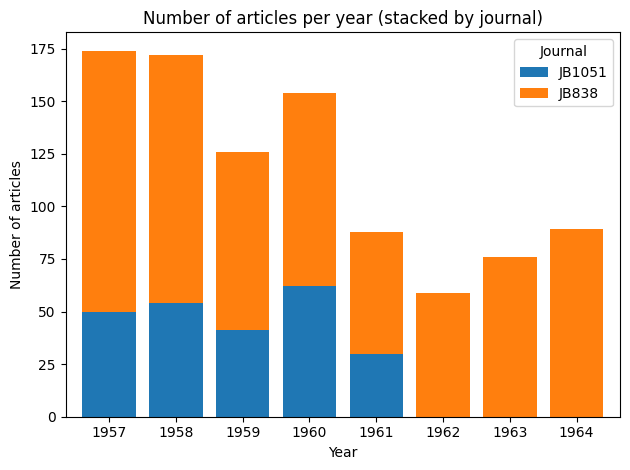

In [77]:
plt.figure(figsize=(12, 5))

year_counts.plot(
    kind="bar",
    stacked=True,
    width=0.8
)

plt.xlabel("Year")
plt.ylabel("Number of articles")
plt.title("Number of articles per year (stacked by journal)")
plt.xticks(rotation=0)

plt.legend(title="Journal")
plt.tight_layout()
plt.show()


In [78]:
counts = (
    df.groupby(["journal", "year", "month", "year_month"])
      .size()
      .reset_index(name="n_articles")
      .sort_values(["year", "month"])
)

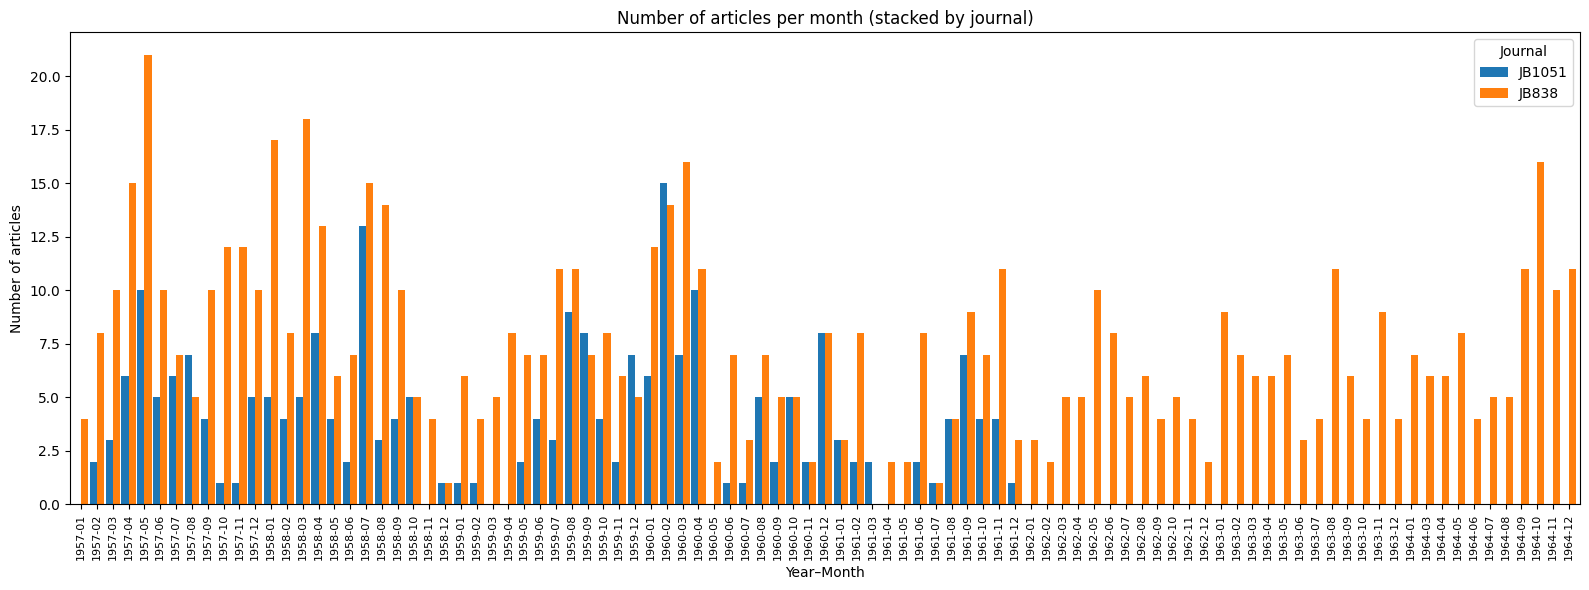

In [83]:
df["year_month"] = pd.to_datetime(df["year_month"], format="%Y-%m")
df = df.sort_values("year_month")
df["year_month_str"] = df["year_month"].dt.strftime("%Y-%m")

ym_counts = (
    df.groupby(["year_month_str", "journal"])
      .size()
      .unstack(fill_value=0)
)

# Plot stacked bars
ax = ym_counts.plot(kind="bar", stacked=False, figsize=(16, 6), width=0.9)

ax.set_xlabel("Year–Month")
ax.set_ylabel("Number of articles")
ax.set_title("Number of articles per month (stacked by journal)")

plt.xticks(rotation=90, fontsize=8)
plt.legend(title="Journal")
plt.tight_layout()
plt.show()
